# Based on Krizhevsky et al, 2012

- Incorpores preproceses and augmentation layers
- Changes Output layer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Entorno de Ejecución


---



In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Aug 29 16:37:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    46W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import numpy as np
import os
# import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam


# Creating dataset and model

In [ ]:
img_train = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/train'


traindataset = K.utils.image_dataset_from_directory(img_train,
                                                    label_mode='categorical',
#                                                     color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(48,48),
                                                    seed=7,
                                                    )

img_test = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/test'

testdataset = K.utils.image_dataset_from_directory(img_test,
                                                    label_mode='categorical',
#                                                     color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(48,48),
                                                    seed=7,
                                                    )


Found 28729 files belonging to 7 classes.
Found 7208 files belonging to 7 classes.


In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/AlexNet.h5'

model = Sequential()

model.add(K.layers.experimental.preprocessing.Resizing(227, 227, input_shape=(48, 48, 3)))
model.add(K.layers.experimental.preprocessing.Rescaling(1./255))
model.add(K.layers.experimental.preprocessing.RandomFlip('horizontal', 0))
model.add(K.layers.experimental.preprocessing.RandomContrast([0.9, 1.1], 1))
model.add(K.layers.experimental.preprocessing.RandomRotation((-0.2, 0.3), seed=2))

model.add(Conv2D(96, (11, 11), strides=4, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model.add(Flatten())

model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax', kernel_initializer='he_normal'))


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 227, 227, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 227, 227, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 227, 227, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 227, 227, 3)      0         
 rast)                                                           
                                                                 
 random_rotation (RandomRota  (None, 227, 227, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        3

In [ ]:
def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

best = [K.callbacks.ModelCheckpoint(model_path,
                                   save_best_only=True),
       K.callbacks.LearningRateScheduler(scheduler)
#        K.callbacks.EarlyStopping(monitor='val_loss',
#                                 patience=5,
#                                 verbose=1)
       ]

history = model.fit(traindataset,
                    validation_data=testdataset,
                    epochs=100,
                    verbose=True,
                    callbacks=best)

Epoch 1/100
898/898 [==============================] - 23s 26ms/step - loss: 1.0937 - accuracy: 0.5871 - val_loss: 1.1036 - val_accuracy: 0.5791 - lr: 1.4957e-05
Epoch 2/100
898/898 [==============================] - 24s 27ms/step - loss: 1.0874 - accuracy: 0.5880 - val_loss: 1.0953 - val_accuracy: 0.5862 - lr: 1.3534e-05
Epoch 3/100
898/898 [==============================] - 18s 19ms/step - loss: 1.0743 - accuracy: 0.5947 - val_loss: 1.0983 - val_accuracy: 0.5839 - lr: 1.2246e-05
Epoch 4/100
898/898 [==============================] - 17s 19ms/step - loss: 1.0649 - accuracy: 0.5985 - val_loss: 1.0955 - val_accuracy: 0.5902 - lr: 1.1080e-05
Epoch 5/100
898/898 [==============================] - 23s 25ms/step - loss: 1.0575 - accuracy: 0.6035 - val_loss: 1.0851 - val_accuracy: 0.5895 - lr: 1.0026e-05
Epoch 6/100
898/898 [==============================] - 17s 19ms/step - loss: 1.0523 - accuracy: 0.6030 - val_loss: 1.0871 - val_accuracy: 0.5896 - lr: 9.0718e-06
Epoch 7/100
898/898 [=======

In [ ]:
print(type(history.history))
print(history.history.keys())
largo = len(history.history['accuracy'])
largo

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


100

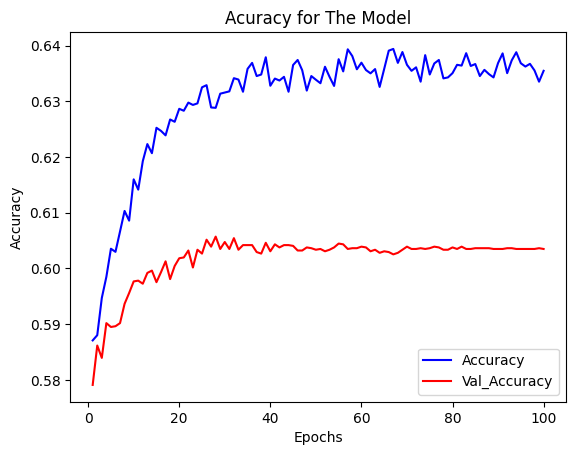

In [ ]:
# Review Accuracy

plt.plot(range(1, largo + 1), history.history['accuracy'], '-b', label='Accuracy')
plt.plot(range(1, largo + 1), history.history['val_accuracy'], '-r', label='Val_Accuracy')
plt.title('Acuracy for The Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
eval = model.evaluate(testdataset, verbose=True, use_multiprocessing=True, return_dict=True)

226/226 [==============================] - 3s 13ms/step - loss: 1.0566 - accuracy: 0.6035


In [ ]:
print(eval)

{'loss': 1.0565754175186157, 'accuracy': 0.6034961342811584}


In [ ]:
prediction = model.predict(testdataset)

226/226 [==============================] - 3s 13ms/step


In [ ]:
print(prediction)
print(prediction.shape)

[[1.18676223e-01 1.25711756e-02 1.65641189e-01 ... 1.90080926e-01
  4.92070645e-01 1.89099312e-02]
 [7.90744945e-02 6.31150305e-02 5.91117322e-01 ... 6.18914608e-03
  3.58669274e-02 1.20301761e-01]
 [2.38034800e-02 1.53052458e-03 9.48793963e-02 ... 5.72402999e-02
  4.40419018e-01 2.59344495e-04]
 ...
 [1.23198718e-01 5.50998189e-03 1.08415090e-01 ... 1.08123057e-01
  5.92364192e-01 6.09249203e-03]
 [9.34994896e-05 4.29691539e-07 8.41687713e-03 ... 3.77609467e-06
  1.75345922e-05 9.91372347e-01]
 [5.49919251e-03 1.04161656e-04 1.72929689e-02 ... 8.91516507e-01
  3.77792120e-02 2.65837647e-03]]
(7208, 7)


In [ ]:
names = {k: v for v, k in enumerate(testdataset.class_names)}
print(names)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [ ]:
y_true = []
y_pred = []

for x, y in testdataset:
    predictions = model.predict(x)

    predicted_classes = np.argmax(predictions, axis=1)

    true_classes = np.argmax(y.numpy(), axis=1)

    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)


1/1 [==============================] - 0s 101ms/step


In [ ]:
!pip install scikit-learn
!pip install seaborn

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

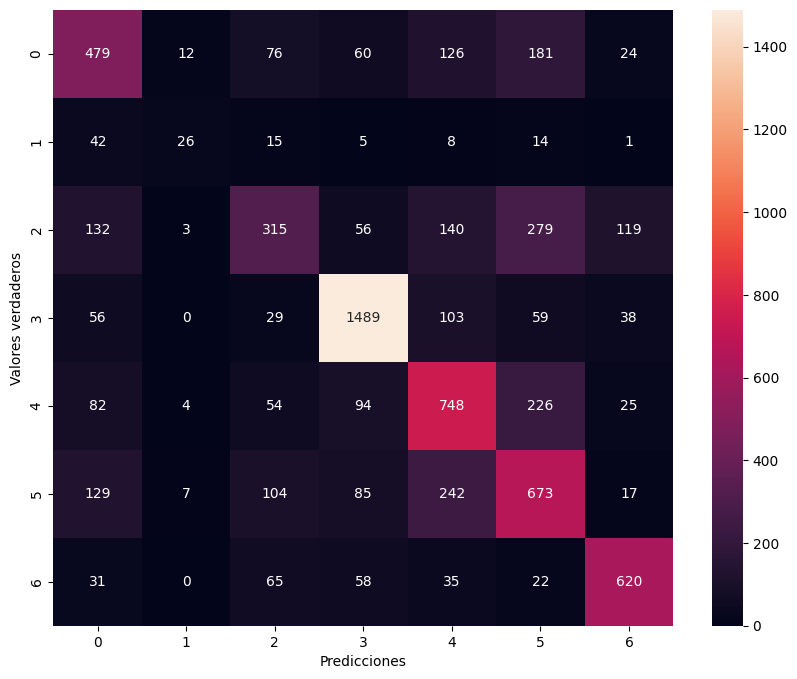

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()
